### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option("max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load the data
Display the first 5 rows of the data after loading.

In [2]:
data = pd.read_csv(r"https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")
data.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    914102        13.16         20.54           84.06      538.7   
1     91858        11.75         17.56           75.89      422.9   
2  88466802        10.65         25.22           68.01      347.0   
3   9111843        12.00         28.23           76.77      442.5   
4  84862001        16.13         20.68          108.10      798.8   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.07335           0.05275         0.01800              0.01256   
1          0.10730           0.09713         0.05282              0.04440   
2          0.09657           0.07234         0.02379              0.01615   
3          0.08437           0.06450         0.04055              0.01945   
4          0.11700           0.20220         0.17220              0.10280   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.1713                 0.05888     0.3237       1.473         2.326   
1         0.1598                 0.06677     0.4384       1.907         3.149   
2         0.1897                 0.06329     0.2497       1.493         1.497   
3         0.1615                 0.06104     0.1912       1.705         1.516   
4         0.2164                 0.07356     0.5692       1.073         3.854   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0    26.07       0.007802         0.02052       0.01341           0.005564   
1    30.66       0.006587         0.01815       0.01737           0.013160   
2    16.64       0.007189         0.01035       0.01081           0.006245   
3    13.86       0.007334         0.02589       0.02941           0.009166   
4    54.18       0.007026         0.02501       0.03188           0.012970   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.02086              0.002701         14.50          28.46   
1      0.01835              0.002318         13.50          27.98   
2      0.02158              0.002619         12.25          35.19   
3      0.01745              0.004302         13.09          37.88   
4      0.01689              0.004142         20.96          31.48   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            95.29       648.3            0.1118             0.1646   
1            88.52       552.3            0.1349             0.1854   
2            77.98       455.7            0.1499             0.1398   
3            85.07       523.7            0.1208             0.1856   
4           136.80      1315.0            0.1789             0.4233   

   concavity_worst  concave points_worst  symmetry_worst  \
0          0.07698               0.04195          0.2687   
1          0.13660               0.10100          0.2478   
2          0.11250               0.06136          0.3409   
3          0.18110               0.07116          0.2447   
4          0.47840               0.20730          0.3706   

   fractal_dimension_worst diagnosis  
0                  0.07429         B  
1                  0.07757         B  
2                  0.08147         B  
3                  0.08194         B  
4                  0.11420         M

## Perform Basic Exploratory Data Analysis (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [4]:
data.describe(include="all").round(2)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count   3.980000e+02       398.00        398.00          398.00     398.00   
unique           NaN          NaN           NaN             NaN        NaN   
top              NaN          NaN           NaN             NaN        NaN   
freq             NaN          NaN           NaN             NaN        NaN   
mean    3.076209e+07        14.07         19.33           91.59     651.63   
std     1.277890e+08         3.58          4.22           24.71     358.68   
min     8.913000e+03         6.98         10.72           43.79     143.50   
25%     8.674750e+05        11.64         16.17           74.69     415.38   
50%     9.055295e+05        13.20         18.90           85.66     538.30   
75%     8.812818e+06        15.74         21.66          103.70     780.32   
max     9.113205e+08        28.11         33.81          188.50    2501.00   

        smoothness_mean  compactness_mean  concavity_mean  \
count            398.00            398.00          398.00   
unique              NaN               NaN             NaN   
top                 NaN               NaN             NaN   
freq                NaN               NaN             NaN   
mean               0.10              0.10            0.09   
std                0.01              0.05            0.08   
min                0.05              0.03            0.00   
25%                0.09              0.07            0.03   
50%                0.10              0.10            0.06   
75%                0.11              0.13            0.13   
max                0.13              0.35            0.43   

        concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
count                398.00         398.00                  398.00     398.00   
unique                  NaN            NaN                     NaN        NaN   
top                     NaN            NaN                     NaN        NaN   
freq                    NaN            NaN                     NaN        NaN   
mean                   0.05           0.18                    0.06       0.41   
std                    0.04           0.03                    0.01       0.29   
min                    0.00           0.11                    0.05       0.11   
25%                    0.02           0.16                    0.06       0.23   
50%                    0.03           0.18                    0.06       0.32   
75%                    0.07           0.20                    0.07       0.50   
max                    0.19           0.29                    0.10       2.87   

        texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
count       398.00        398.00   398.00         398.00          398.00   
unique         NaN           NaN      NaN            NaN             NaN   
top            NaN           NaN      NaN            NaN             NaN   
freq           NaN           NaN      NaN            NaN             NaN   
mean          1.21          2.90    40.87           0.01            0.03   
std           0.53          2.15    48.74           0.00            0.02   
min           0.36          0.76     6.80           0.00            0.00   
25%           0.83          1.57    17.60           0.01            0.01   
50%           1.14          2.31    24.38           0.01            0.02   
75%           1.47          3.46    45.73           0.01            0.03   
max           3.90         21.98   542.20           0.03            0.11   

        concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
count         398.00             398.00       398.00                398.00   
unique           NaN                NaN          NaN                   NaN   
top              NaN                NaN          NaN                   NaN   
freq             NaN                NaN          NaN                   NaN   
mean            0.03               0.01         0.02                  0.

#### Check for data Distribution

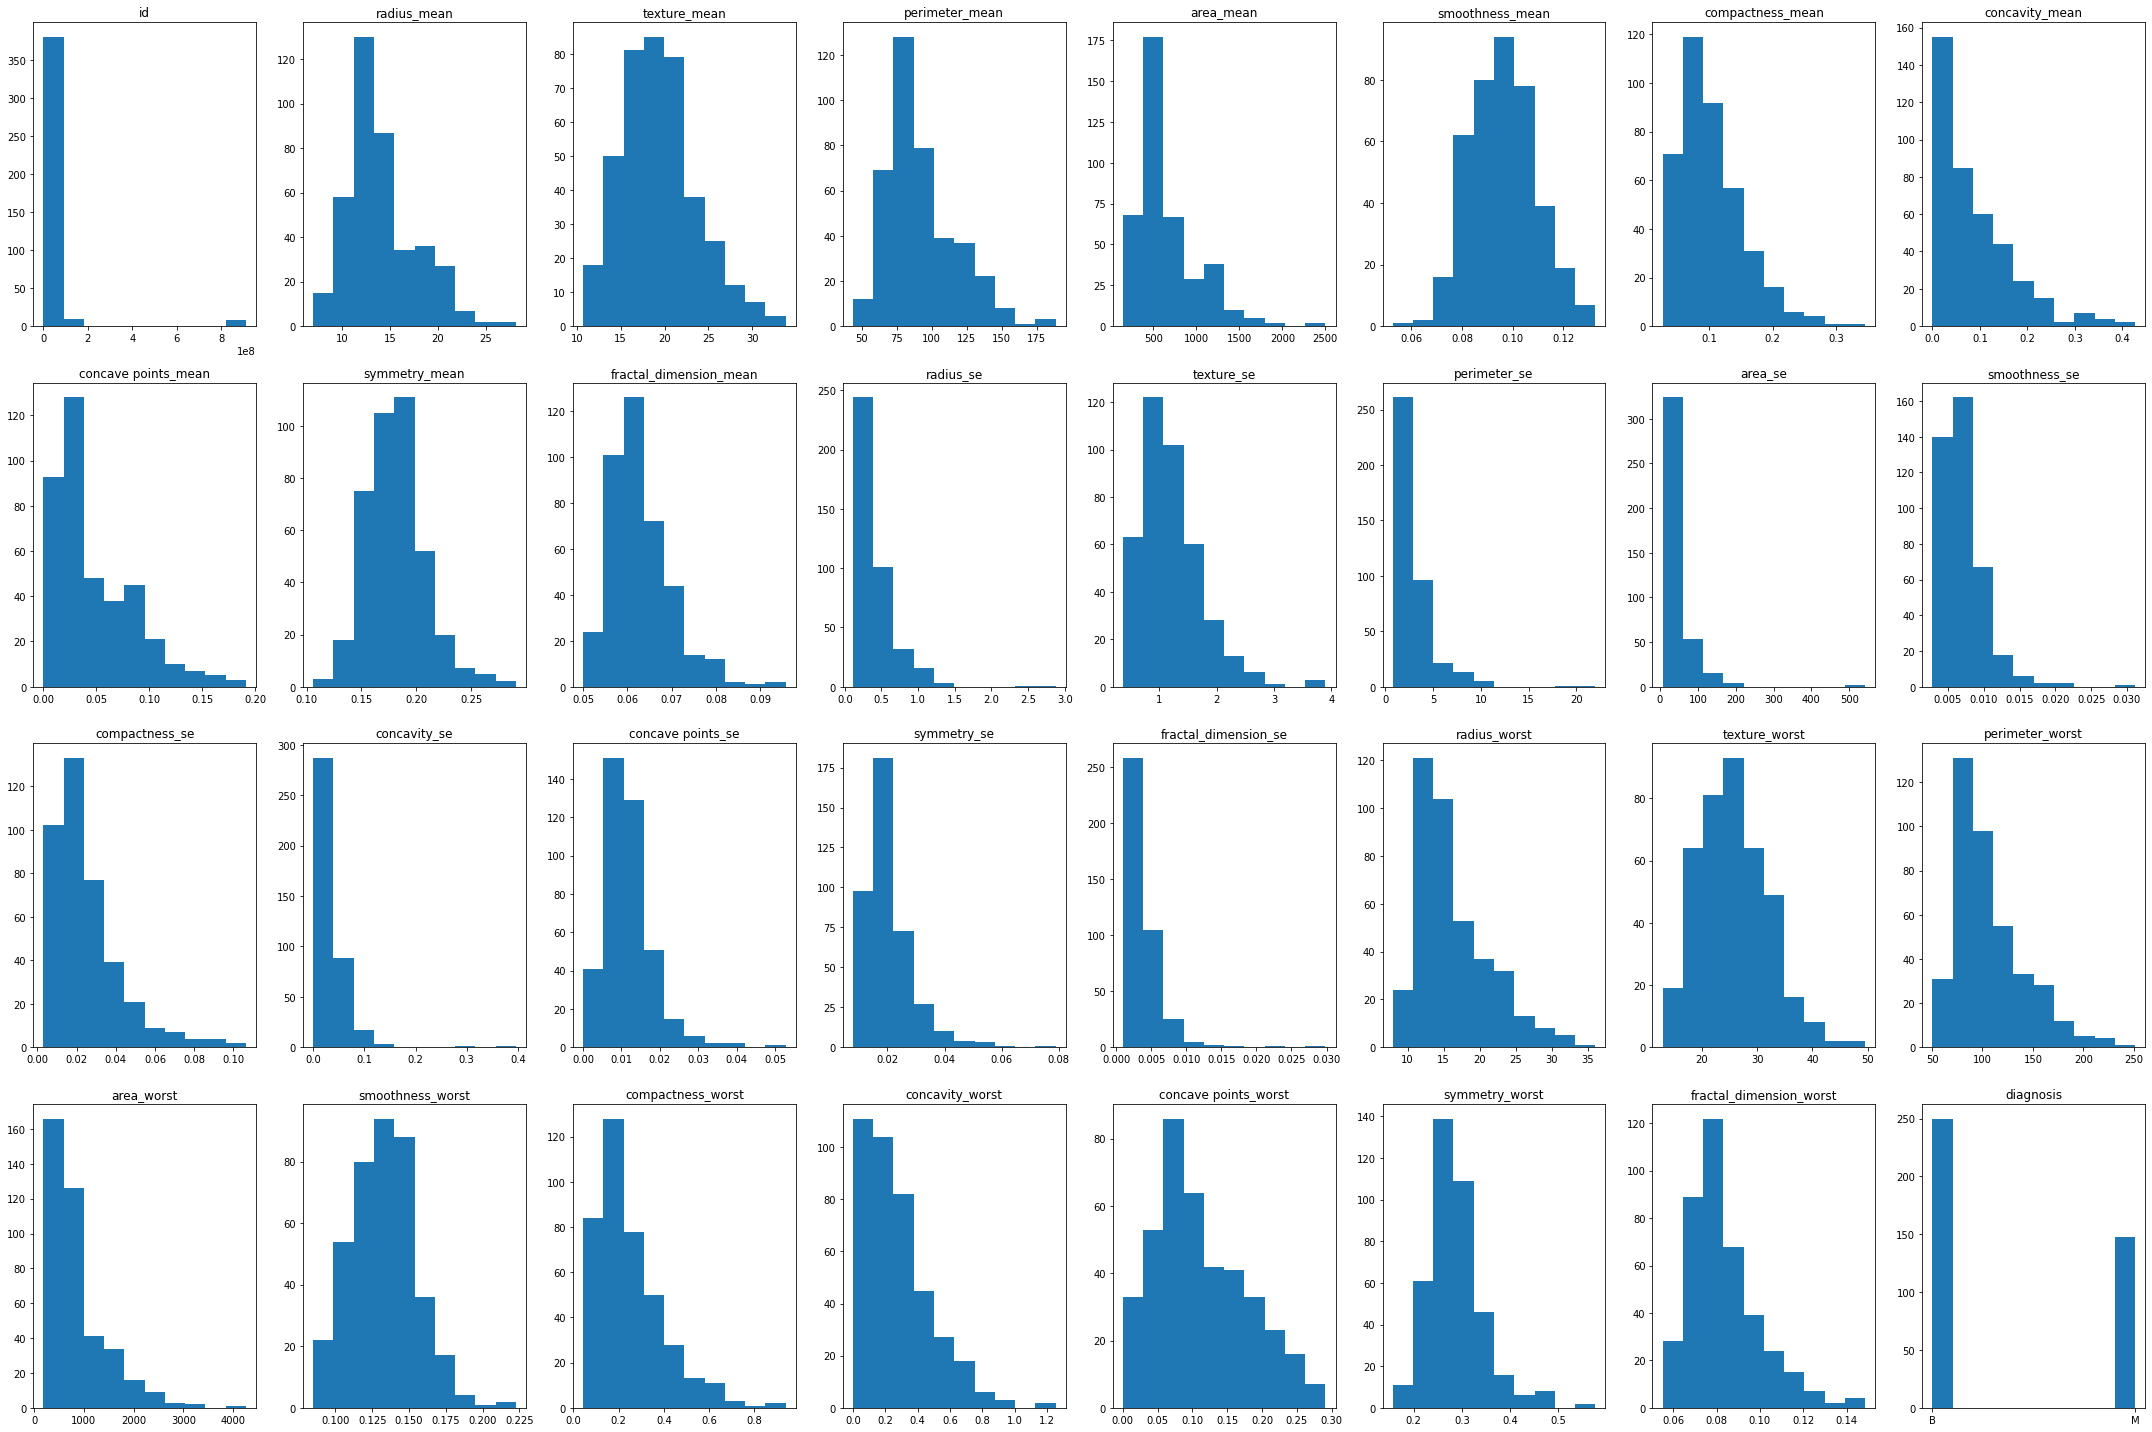

In [5]:
plt.figure(figsize=(30,20))
for ind,i in enumerate(data.columns):
    plt.subplot(4,8,ind+1)
    plt.title(i)
    plt.hist(i,data=data)
plt.tight_layout()
plt.show()

#### Check Correlation Feature

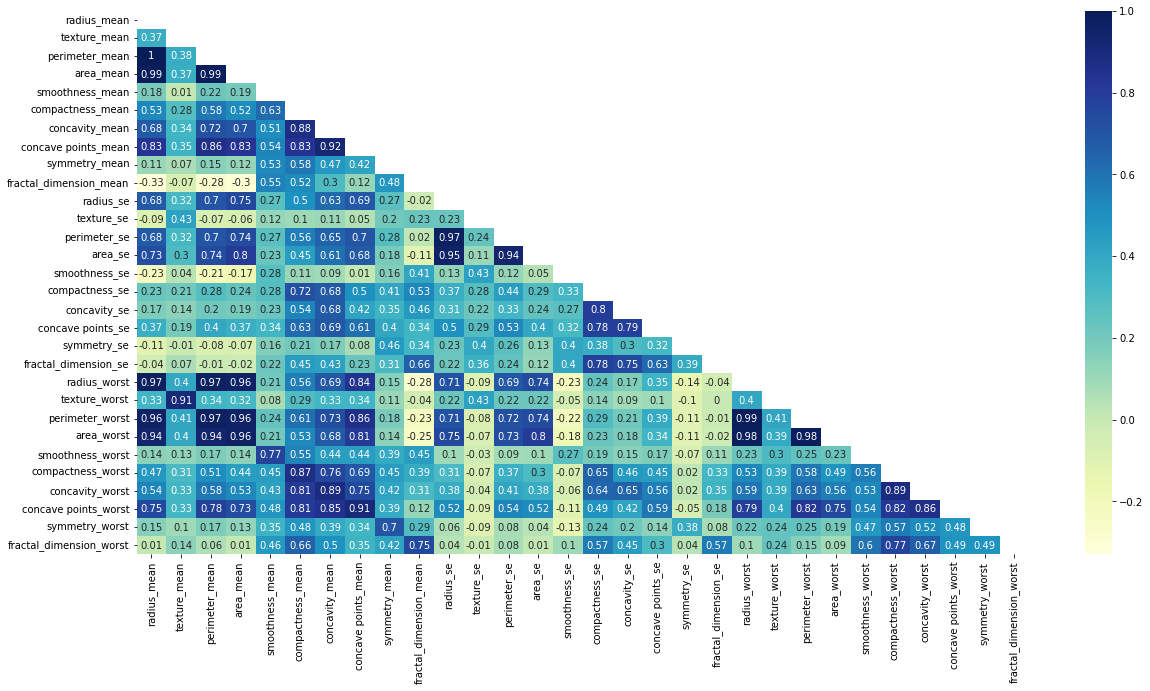

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data.drop(columns="id").corr().round(2), cmap="YlGnBu", annot=True, mask = np.triu(np.ones_like(data.drop(columns="id").corr())))
plt.show()

From the correlation heatmap, we can conclude that all features end with "_se" and end with "_worst" are correlated to feature that end with "_mean". Hence, we will use feature with "_mean" only, and drop feature with "_se" and "_worst"

In [7]:
used_feature = [col for col in data.columns if '_mean' in col]

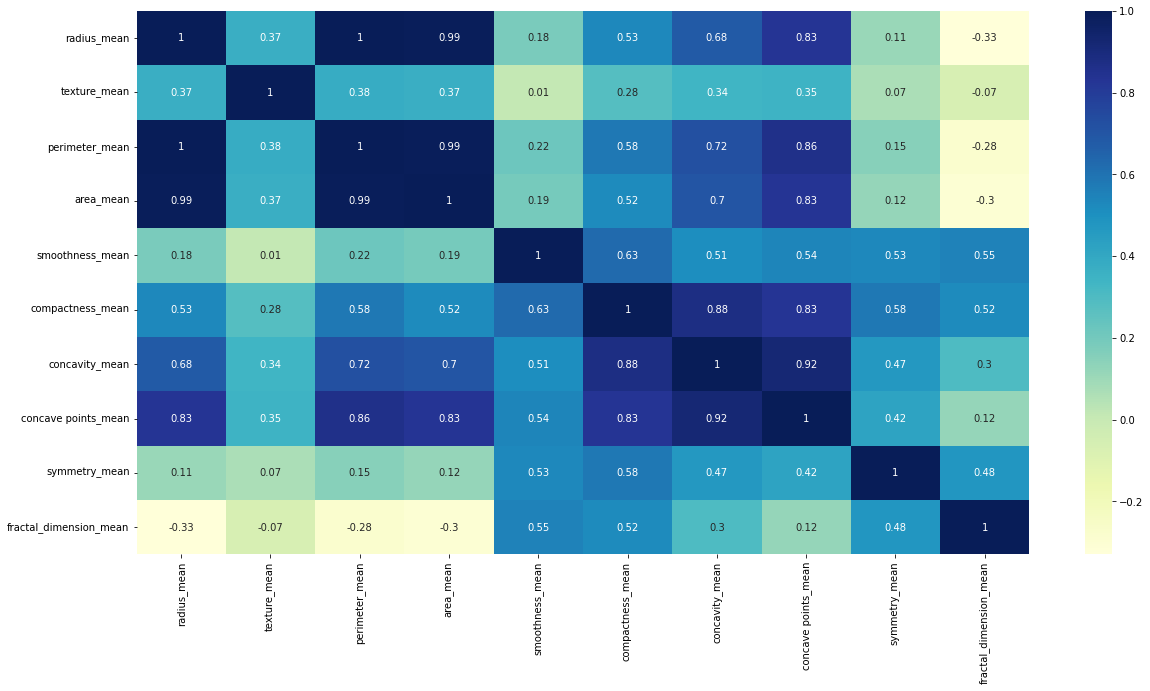

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data[used_feature].corr().round(2), cmap="YlGnBu", annot=True)
plt.show()

We can see that there are still a lot variable that highly correlated, so to avoid using redundant features several feature will be exclude, as below :
1. Perimeter Mean
2. Area Mean
3. Concave Point Mean

In [9]:
used_feature_fix = list(set(used_feature)-set(["perimeter_mean","area_mean","concave points_mean"]))

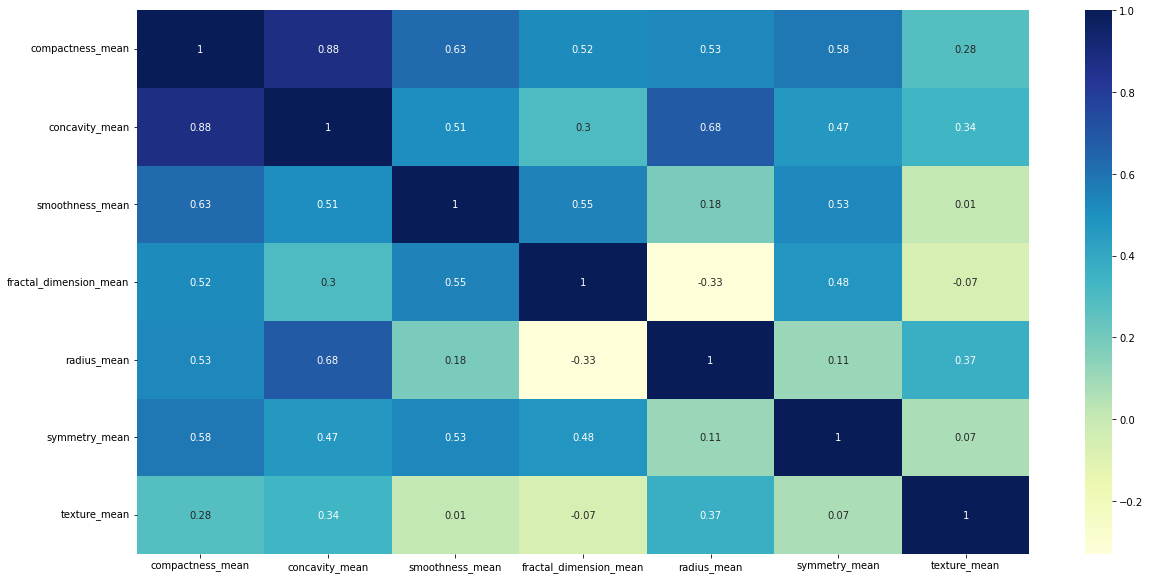

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(data[used_feature_fix].corr().round(2), cmap="YlGnBu", annot=True)
plt.show()

As the heatmap correlation above, now we have un-redundant features, but still we have highly correlated feature, that is concavity mean with compactness mean. But since the correlation is belo 0.9 so we will not exclude the feature

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

#### Convert target into binary

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
y = le.fit_transform(data.iloc[:,-1])
y[:5]

array([0, 0, 0, 0, 1])

#### Check Mapping

In [14]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'B': 0, 'M': 1}


In [15]:
X = data[used_feature_fix]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

#### Feature Scaling

In [18]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=used_feature_fix)
X_train = pd.DataFrame(scaler.transform(X_train), columns=used_feature_fix)

# Task 2

## Use Random Forest Machine Learning Model for prediction

In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [20]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
y_pred = clf.predict(X_test)

## Evaluate the model using Accuracy Score

In [22]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [23]:
confusion_matrix(y_test, y_pred)

array([[41,  1],
       [ 8, 30]], dtype=int64)

In [24]:
f1_score(y_test, y_pred)

0.8695652173913043

In [25]:
precision_score(y_test, y_pred)

0.967741935483871

In [26]:
accuracy_score(y_test, y_pred)

0.8875

With accuracy 90%, and precision 97% the model is good enough to predict diagnosis. Hence hyperparameter tuning will be not explore and will be continued by explaining model with SHAP

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [27]:
# creating an explainer for our model
explainer = shap.TreeExplainer(clf)

In [28]:
shap_values = explainer.shap_values(X_test)

In [29]:
print('Expected Value:', explainer.expected_value)

Expected Value: [0.65572327 0.34427673]


In [30]:
y1=data.diagnosis.map({'B':0, 'M':1}).astype(np.int)

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [31]:
shap_values_benign = pd.DataFrame(shap_values[0])
shap_values_malignant = pd.DataFrame(shap_values[1])

shap_values_benign.head()

0         1         2         3         4         5         6
0 -0.018063 -0.323213 -0.013023 -0.009375  0.022357 -0.013373 -0.111034
1  0.044393  0.118756 -0.008032  0.007794  0.133347  0.004425  0.043594
2  0.050147  0.093154 -0.024358  0.004912  0.119246  0.000509  0.000666
3  0.045785  0.098560  0.027107 -0.001718  0.109958  0.008586  0.056001
4  0.053214  0.126179  0.029142 -0.000060  0.087910  0.001685  0.046207

## Write your inferences from the generated plot.

From the explainer we can conclude that the prediction class has 2 classes, benign and malignant. For benign class the Expected value is 0.66, meanwhile for malignant class the Expected value is 0.34. If we have point of view from malignant class, if shap value for 1 data point is higher than 0.34, the data point will be classified as class 1 (malignant), and if shap value for 1 data point is lower than 0.34, it will be predicted as class 0 (benign)

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [32]:
y_test[0]

1

For the first row, the data is malignant

In [33]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],
                shap_values[1][0,:], X_test_disp.iloc[0,:])

## Write your inferences from the generated plot.

The first row of y_test is a malignant type tumor. From the force plot we can inference that concavity_mean, texture_mean, and texture_mean has dominant positive weights to the prediction, meanwhile the radius_mean feature has negative weights to the prediction. The final value is 0.77 which is higher than base value (0.34) hence it classified to malignant tumor (has high risk of developing breast cancer)

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [34]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1],X_test_disp)

## Write your inferences from the generated plot.

# Task 6

## Plot a SHAP summary plot using all the features in the data

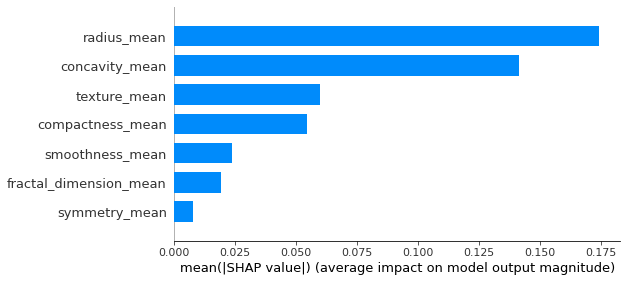

In [35]:
shap.initjs()
shap.summary_plot(shap_values[1],
                  X_test_disp, plot_type="bar")

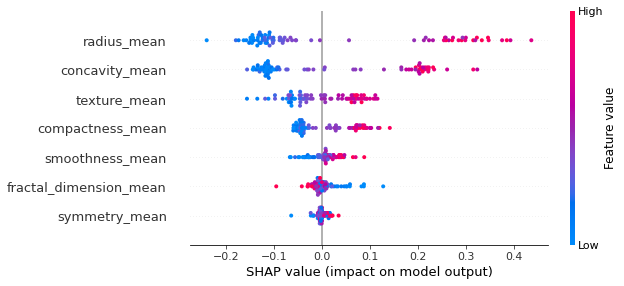

In [36]:
shap.initjs()
shap.summary_plot(shap_values[1],X_test_disp)

## Write your inferences from the generated plot.

From the summary plot we can inference that :
* Radius_mean, concavity_mean, texture_mean, and compactness_mean has more total impact than other features

# Task 7

##Plot a SHAP dependecne plot using all features in the data

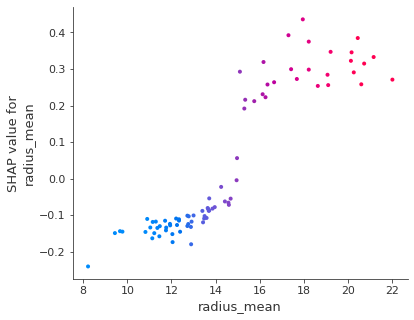

In [37]:
shap.initjs()
shap.dependence_plot(ind='radius_mean', interaction_index='radius_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

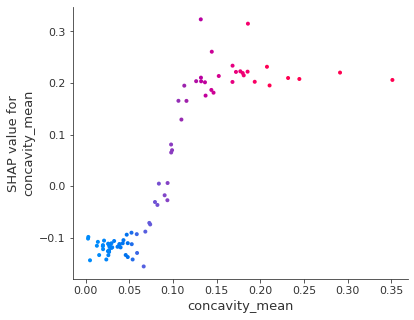

In [38]:
shap.initjs()
shap.dependence_plot(ind='concavity_mean', interaction_index='concavity_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

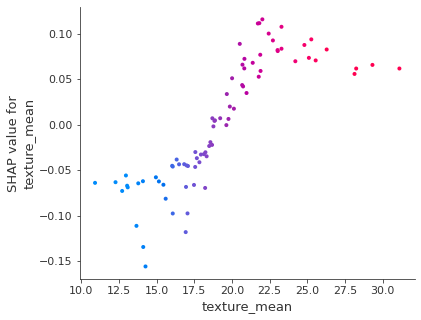

In [39]:
shap.initjs()
shap.dependence_plot(ind='texture_mean', interaction_index='texture_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

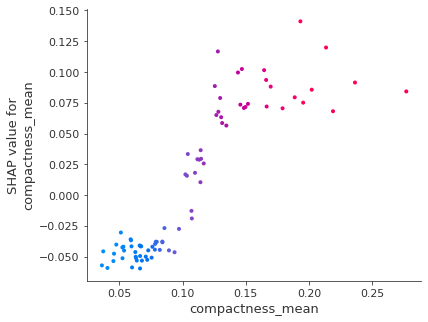

In [40]:
shap.initjs()
shap.dependence_plot(ind='compactness_mean', interaction_index='compactness_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

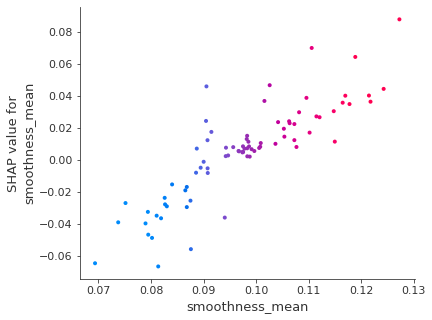

In [41]:
shap.initjs()
shap.dependence_plot(ind='smoothness_mean', interaction_index='smoothness_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

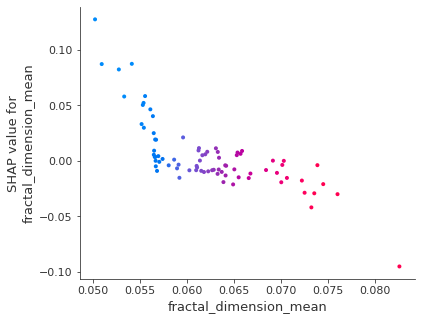

In [42]:
shap.initjs()
shap.dependence_plot(ind='fractal_dimension_mean', interaction_index='fractal_dimension_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

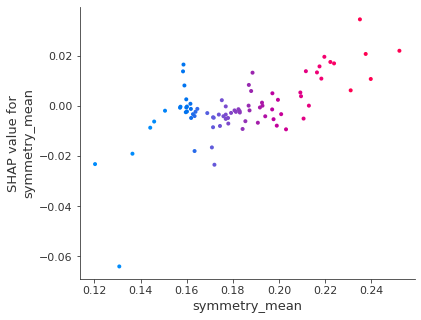

In [43]:
shap.initjs()
shap.dependence_plot(ind='symmetry_mean', interaction_index='symmetry_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

## Write your inferences from the generated plot.

From the dependence plot we can inference that :
* As higher as the radius_mean, the shap value tend to be higher, and also if the radius_mean is lower then the shap vallue tend to be lower too. It pushing the model's decisioin to say that higher radius_mean means the tumor wil be classified as malignant tumor, and the lower radius_mean will be classify to benign tumor. Sample who has radius_mean > 16 tend to have higher shap value, or will be classified to have malignant tumor.
* As higher the concavity_mean, the shap value also tend to be higher that pushing the model's prediction decision to say that sample wiith higher concavity_mean will be classify as malignant tumor.
* Higher texture mean have higher shap values, pushing the model's prediction decision to say that the sample will be classify as malignant tumor rather than benign tumor, vice versa.
* Higher compactness mean tends to have higher shap values, and it means that it push the model's prediction decision to say that the samplle will be classify as malignant tumor rather than benign tumor, vice versa. It also happend to smoothness
* For fractal_dimmension_mean and symmetry_mean tends to shap value around 0. It's mean that this 2 feature not have a lot of impact to the model predictions

# Task 8 (Optional)

Will be checking Relationship between features that have dominant impact to prediction, e.g: radius_mean, concavity_mean, and texture_mean 

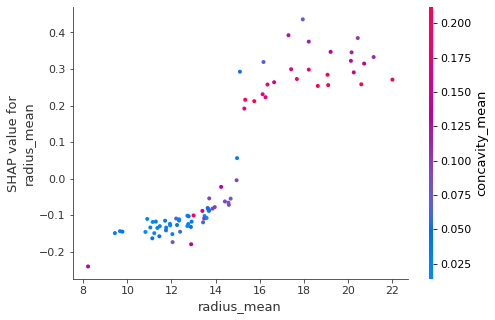

In [44]:
shap.initjs()
shap.dependence_plot(ind='radius_mean', interaction_index='concavity_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

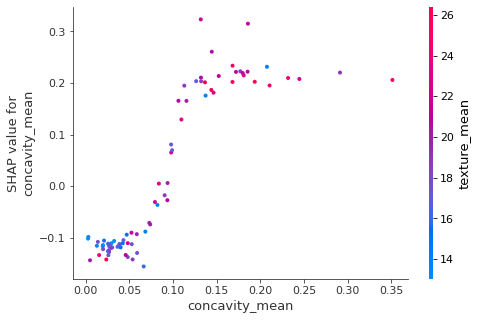

In [45]:
shap.initjs()
shap.dependence_plot(ind='concavity_mean', interaction_index='texture_mean',
                     shap_values=shap_values[1],
                     features=X_test_disp)

* From the dependence plot we can interfere that sample with higher radius_mean, concavity_mean, and texture_mean having higher chance to be classified as malignant tumor

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.